In [16]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [17]:
G = nx.read_edgelist('booktok_edgelist.txt', delimiter='\t', create_using=nx.DiGraph())

Error in callback <function _draw_all_if_interactive at 0x000001FE50E50540> (for post_execute):


KeyboardInterrupt: 

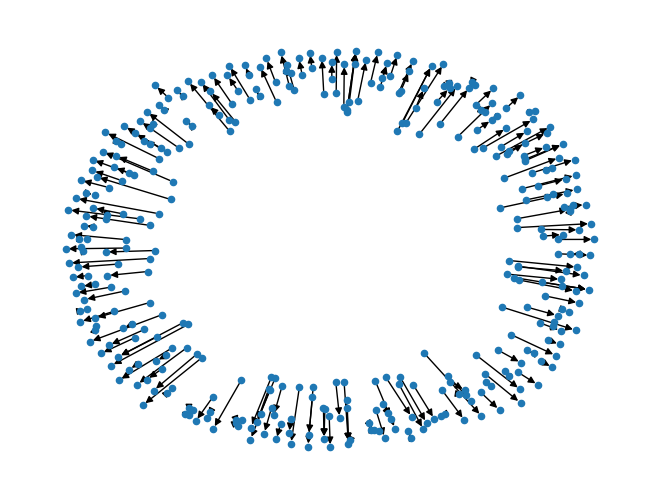

In [18]:
nx.draw_spring(G, node_size=20)

<BarContainer object of 5 artists>

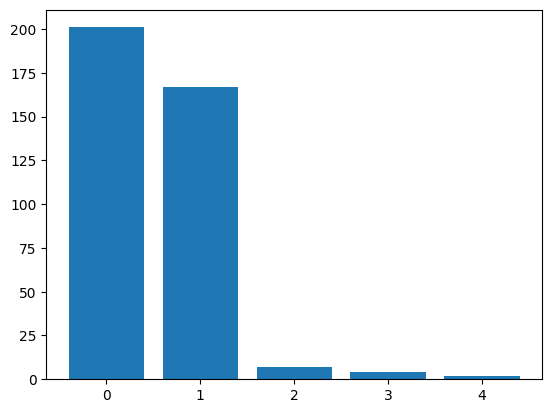

In [ ]:
fig, ax = plt.subplots()
degree_sequence = degree_sequence = sorted((d for n, d in G.in_degree()), reverse=True)
ax.bar(*np.unique(degree_sequence, return_counts=True))

In [ ]:
np.unique(degree_sequence, return_counts=True)

(array([0, 1, 2, 3, 4]), array([201, 167,   7,   4,   2]))

In [ ]:
largest_cc = max(nx.connected_components(nx.to_undirected(G)), key=len)

In [ ]:
largest_cc

{'https://www.tiktok.com/@amyirby5/video/7375134798370704682',
 'https://www.tiktok.com/@leahs.library8/video/7375300736453758241',
 'https://www.tiktok.com/@rebeccarosereads/video/7375251771385580833',
 'https://www.tiktok.com/@sofiesbooked/video/7374854606385433898',
 'https://www.tiktok.com/@thatguyjae/video/7367479745308527915'}

How many videos stitch outside their hashtag?

In [ ]:
import json

hashtag = 'watermelon'

# Load original video information
data_path = f"../data/hashtags/vertices/{hashtag}.json"
with open(data_path, 'r') as f:
    original_videos = json.load(f)

hashtag_not_used = 0
hashtags_used = 0

# Calculate the percentage of videos that stitch outside the hashtag
for original_id, original_data in original_videos.items():
    if original_data['is_stitchee']:
        if hashtag not in original_data['hashtag_names']:
            hashtag_not_used += 1
        else:
            hashtags_used += 1

In [ ]:
print(f"Hashtag: {hashtag}")
print(f"Hashtag used: {hashtags_used}")
print(f"Hashtag not used: {hashtag_not_used}")
print(f"{hashtags_used / (hashtag_not_used + hashtags_used) * 100:.2f}% of stitched videos used the hashtag of the stitch video")

Hashtag: watermelon
Hashtag used: 7
Hashtag not used: 129
5.15% of stitched videos used the hashtag of the stitch video


In [ ]:
#The above, but for all hashtags
import json
import os

hashtags = os.listdir('../data/hashtags/vertices')

#remove .json from hashtags
hashtags = [hashtag[:-5] for hashtag in hashtags]

for hashtag in hashtags:
    # Load original video information
    data_path = f"../data/hashtags/vertices/{hashtag}.json"
    if os.path.isfile(data_path):  # Check if the path is a file
        with open(data_path, 'r') as f:
            original_videos = json.load(f)

        hashtag_not_used = 0
        hashtags_used = 0

        # Calculate the percentage of videos that stitch outside the hashtag
        for original_id, original_data in original_videos.items():
            if original_data['is_stitchee']:
                if hashtag not in original_data['hashtag_names']:
                    hashtag_not_used += 1
                else:
                    hashtags_used += 1

        print(f"Hashtag: {hashtag}")
        print(f"Hashtag used: {hashtags_used}")
        print(f"Hashtag not used: {hashtag_not_used}")
        print(f"{hashtags_used / (hashtag_not_used + hashtags_used) * 100:.2f}% of stitched videos used the hashtag of the stitch video")
        print()

Hashtag: anime
Hashtag used: 367
Hashtag not used: 492
42.72% of stitched videos used the hashtag of the stitch video

Hashtag: asmr
Hashtag used: 22
Hashtag not used: 65
25.29% of stitched videos used the hashtag of the stitch video

Hashtag: biden2024
Hashtag used: 6
Hashtag not used: 102
5.56% of stitched videos used the hashtag of the stitch video

Hashtag: blacklivesmatter
Hashtag used: 3
Hashtag not used: 198
1.49% of stitched videos used the hashtag of the stitch video

Hashtag: booktok
Hashtag used: 869
Hashtag not used: 942
47.98% of stitched videos used the hashtag of the stitch video

Hashtag: challenge
Hashtag used: 19
Hashtag not used: 260
6.81% of stitched videos used the hashtag of the stitch video

Hashtag: climatechange
Hashtag used: 8
Hashtag not used: 33
19.51% of stitched videos used the hashtag of the stitch video

Hashtag: comedy
Hashtag used: 98
Hashtag not used: 2383
3.95% of stitched videos used the hashtag of the stitch video

Hashtag: conspiracy
Hashtag used:

Ratio between stitcher view count and stitchee view count

In [60]:
import json

hashtag = 'election'

# Load original video information
data_path = f"../data/hashtags/vertices/{hashtag}.json"
with open(data_path, 'r') as f:
    original_videos = json.load(f)

stitcher_view_count = []
stitchee_view_count = []

# Get the view count of the stitcher and stitchee
for original_id, original_data in original_videos.items():
    if original_data['is_stitcher']:
        stitcher_view_count.append(original_data['view_count'])
        #get the stitchee view count
        stitchee_id = original_data['stitches']
        stitchee_view_count.append(original_videos[str(stitchee_id)]['view_count'] if str(stitchee_id) in original_videos else None)


In [61]:
print(f"Hashtag: {hashtag}")
print(stitcher_view_count)
print(stitchee_view_count)

Hashtag: election
[538, 337, 4456, 56, 156, 29, 258, 969, 115, 409, 333, 427, 204, 224, 156, 514, 140, 1922, 157, 1120, 281, 325, 329, 1284, 1266, 223, 294, 2344, 81709, 131, 3218, 351, 149, 525, 414, 325, 198, 444, 391, 559, 635, 561, 310, 218, 227, 284, 374, 598, 354, 2100, 242, 2084, 366, 8585, 1639, 1123, 427, 396, 1691, 9559, 640, 1459, 85, 510, 790, 471, 367, 31, 25852, 687, 397, 900, 706, 24, 507, 1651, 529, 126, 76, 246, 380, 14325, 25051, 4025, 252, 244, 1979, 3107, 2041, 352, 374, 160, 218, 193, 336, 2901, 299, 199, 330, 283, 245, 302, 321, 384, 315, 293, 368, 583, 294, 3441, 264, 587, 276, 5911, 503, 2008, 374, 271, 483, 412, 221, 273, 930, 435, 1464, 341, 1343, 306, 286, 292, 3788, 585, 789, 42319, 797, 335, 303, 245, 185, 443, 315, 488, 10369, 6611, 4324, 411, 475, 468, 231, 953, 191, 2917, 462, 268, 199, 78356, 279, 421, 241, 297, 479, 72, 72, 582, 3651, 289, 384, 314, 415, 11, 398, 337, 3429, 328, 409, 399, 319, 315, 501, 321, 271, 520, 1842, 33, 1050, 628, 255, 624, 299

In [62]:
#calculate how much bigger the stitchee view count is compared to the stitcher view count
view_count_ratio = [stitchee / stitcher if stitchee is not None else None for stitcher, stitchee in zip(stitcher_view_count, stitchee_view_count)]

In [63]:
#average of all view count ratios
average_view_count_ratio = np.mean([ratio for ratio in view_count_ratio if ratio is not None])

In [64]:
average_view_count_ratio

10248.932361290219

In [65]:
#median of all view count ratios
median_view_count_ratio = np.median([ratio for ratio in view_count_ratio if ratio is not None])

In [66]:
median_view_count_ratio

936.8239436619718

In [67]:
#mean of all stitcher view counts
average_stitcher_view_count = np.mean([view_count for view_count in stitcher_view_count if view_count is not None])

In [68]:
average_stitcher_view_count

5998.825112107624

In [69]:
#mean of all stitchee view counts
average_stitchee_view_count = np.mean([view_count for view_count in stitchee_view_count if view_count is not None])

In [70]:
average_stitchee_view_count

1887430.822485207

In [ ]:
#the above but for all hashtags
import json
import numpy as np
import os

hashtags = os.listdir('../data/hashtags/vertices')

#remove .json from hashtags
hashtags = [hashtag[:-5] for hashtag in hashtags]

for hashtag in hashtags:
    # Load original video information
    data_path = f"../data/hashtags/vertices/{hashtag}.json"
    if os.path.isfile(data_path):  # Check if the path is a file
        with open(data_path, 'r') as f:
            original_videos = json.load(f)

        stitcher_view_count = []
        stitchee_view_count = []

        # Get the view count of the stitcher and stitchee
        for original_id, original_data in original_videos.items():
            if original_data['is_stitcher']:
                stitcher_view_count.append(original_data['view_count'])
                #get the stitchee view count
                stitchee_id = original_data['stitches']
                stitchee_view_count.append(original_videos[str(stitchee_id)]['view_count'] if str(stitchee_id) in original_videos else None)

        print(f"Hashtag: {hashtag}")
        #print(stitcher_view_count)
        #print(stitchee_view_count)

        #calculate how much bigger the stitchee view count is compared to the stitcher view count
        view_count_ratio = [stitchee / stitcher if stitchee is not None and stitcher != 0 else None for stitcher, stitchee in zip(stitcher_view_count, stitchee_view_count)]

        #average of all view count ratios
        average_view_count_ratio = np.mean([ratio for ratio in view_count_ratio if ratio is not None])

        print(f"Average view count ratio: {average_view_count_ratio}")

        #median of all view count ratios
        median_view_count_ratio = np.median([ratio for ratio in view_count_ratio if ratio is not None])

        print(f"Median view count ratio: {median_view_count_ratio}")


Hashtag: anime
Average view count ratio: 8139.854977865678
Median view count ratio: 388.35616438356163
Hashtag: asmr
Average view count ratio: 17357.385311923004
Median view count ratio: 2446.6320346320344
Hashtag: biden2024
Average view count ratio: 4230.436495890112
Median view count ratio: 331.53732923881876
Hashtag: blacklivesmatter
Average view count ratio: 8993.042227106122
Median view count ratio: 1491.584478021978
Hashtag: booktok
Average view count ratio: 3921.0727231609235
Median view count ratio: 93.41262418942233
Hashtag: challenge
Average view count ratio: 17054.455139773043
Median view count ratio: 585.3428571428572
Hashtag: climatechange
Average view count ratio: 18292.154280813433
Median view count ratio: 793.1917808219179
Hashtag: comedy
Average view count ratio: 21641.506963340165
Median view count ratio: 2930.802584541063
Hashtag: conspiracy
Average view count ratio: 8656.325994005649
Median view count ratio: 1298.694657072872
Hashtag: election
Average view count rat